In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('laptop_price.csv')


In [69]:
print("Shape of the dataset:", data.shape)
data.info()
print("\nFirst few rows of the dataset:\n", data.head())

Shape of the dataset: (1275, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: fl

In [71]:
import re 
def convert_memory(memory_str):
    total_memory = 0
    # Find all memory sizes in the string
    memory_matches = re.findall(r'(\d+)\s*(GB|TB)', memory_str)
    
    for value, unit in memory_matches:
        value = int(value)
        if unit == 'TB':
            total_memory += value * 1024  # Convert TB to GB
        else:
            total_memory += value  # Already in GB
    
    return total_memory

# Apply the function to the Memory column
data['Memory'] = data['Memory'].apply(convert_memory)

# Display the cleaned Memory column
print(data['Memory'].head())

0    128
1    128
2    256
3    512
4    256
Name: Memory, dtype: int64


In [21]:
len(data['Memory'])

1275

In [23]:
data.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'ScreenResolution',
       'CPU_Company', 'CPU_Type', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory',
       'GPU_Company', 'GPU_Type', 'OpSys', 'Weight (kg)', 'Price (Euro)'],
      dtype='object')

In [73]:
def extract_resolution(resolution_str):
    match = re.search(r'(\d+)\s*x\s*(\d+)', resolution_str)
    if match:
        width = int(match.group(1))
        height = int(match.group(2))
        return width, height
    return None, None

# Apply the function and create new columns
data[['Width', 'Height']] = data['ScreenResolution'].apply(lambda x: pd.Series(extract_resolution(x))) #check

# Calculate total pixels (optional)
data['Total Pixels'] = data['Width'] * data['Height']

# Display the new columns
print("Preprocessed Screen Resolution Columns:")
print(data[['ScreenResolution', 'Width', 'Height', 'Total Pixels']].head())

Preprocessed Screen Resolution Columns:
                     ScreenResolution  Width  Height  Total Pixels
0  IPS Panel Retina Display 2560x1600   2560    1600       4096000
1                            1440x900   1440     900       1296000
2                   Full HD 1920x1080   1920    1080       2073600
3  IPS Panel Retina Display 2880x1800   2880    1800       5184000
4  IPS Panel Retina Display 2560x1600   2560    1600       4096000


In [ ]:
# Preprocessing the GPU_Type column
def extract_gpu_type(gpu_type_str):
    # Define known GPU types
    gpu_types = [
        "GTX", "RTX", "Vega", "MX", "Integrated", "Quadro", "Radeon", "Iris", 
        "UHD", "HD Graphics", "GeForce", "NVS", "FirePro", "Tesla", "Graphics"
    ]
    if isinstance(gpu_type_str, str):
        for gpu_type in gpu_types:
            if gpu_type in gpu_type_str:
                return gpu_type
        return "Other"  # Default category for unrecognized types
    return "Unknown"

# Apply the function to extract GPU types
data['GPU_Type'] = data['GPU_Type'].apply(extract_gpu_type)


In [75]:
columns_to_drop = [ 'Product','CPU_Company','CPU_Type','ScreenResolution', 'Width', 'Height' ]

data = data.drop(columns=columns_to_drop)

In [77]:
# 2. Descriptive Statistics
print("\nDescriptive Statistics:\n", data.describe(include='all'))


Descriptive Statistics:
        Company  TypeName       Inches  CPU_Frequency (GHz)     RAM (GB)  \
count     1275      1275  1275.000000          1275.000000  1275.000000   
unique      19         6          NaN                  NaN          NaN   
top       Dell  Notebook          NaN                  NaN          NaN   
freq       291       707          NaN                  NaN          NaN   
mean       NaN       NaN    15.022902             2.302980     8.440784   
std        NaN       NaN     1.429470             0.503846     5.097809   
min        NaN       NaN    10.100000             0.900000     2.000000   
25%        NaN       NaN    14.000000             2.000000     4.000000   
50%        NaN       NaN    15.600000             2.500000     8.000000   
75%        NaN       NaN    15.600000             2.700000     8.000000   
max        NaN       NaN    18.400000             3.600000    64.000000   

             Memory GPU_Company         GPU_Type       OpSys  Weight (kg)

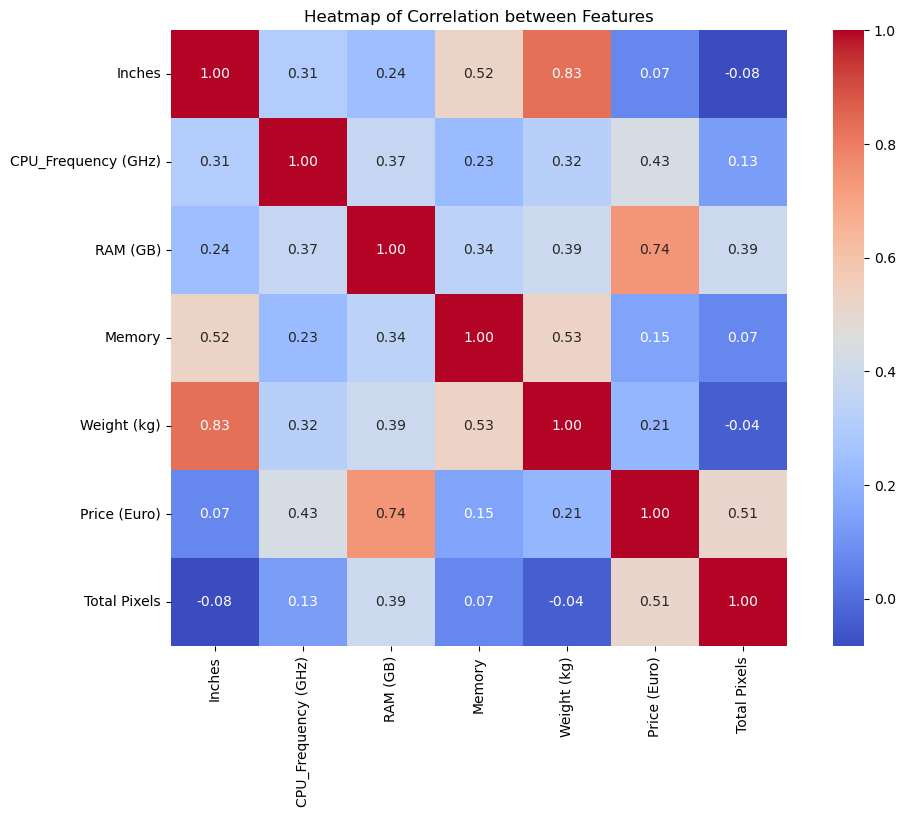

In [79]:
plt.figure(figsize=(12, 8))
correlation = data.corr(numeric_only = True)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Heatmap of Correlation between Features')
plt.show()

The heatmap reveals strong correlations between certain features. For example, price is positively correlated with RAM, CPU frequency, and weight. Notably, screen size and resolution do not show strong correlations with price.

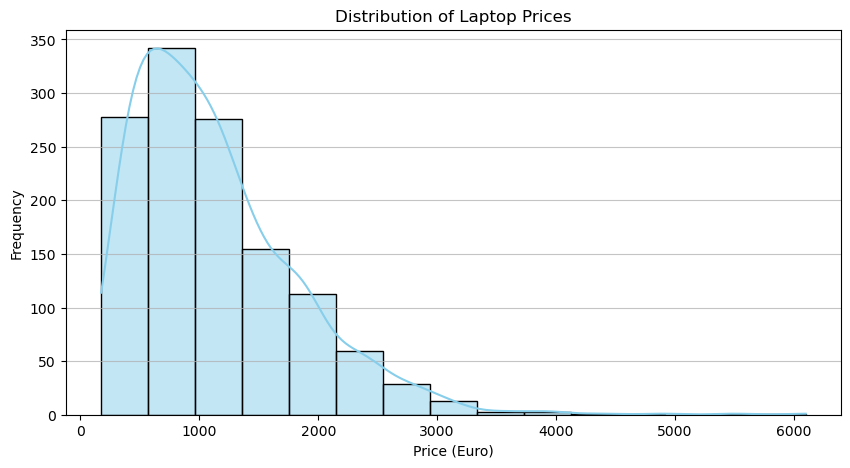

In [81]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Price (Euro)'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of Laptop Prices')
plt.xlabel('Price (Euro)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

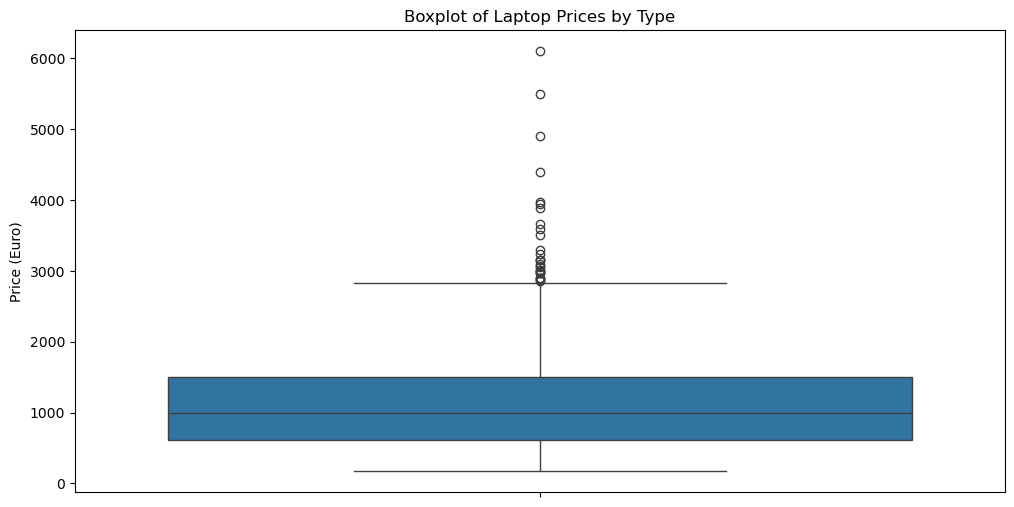

In [11]:
# 3.2 Boxplot of Prices
plt.figure(figsize=(12, 6))
sns.boxplot( y='Price (Euro)', data=data)
plt.title('Boxplot of Laptop Prices by Type')
plt.xticks(rotation=45)
plt.show()

The price distribution shows a right-skewed pattern as shown by the larger mean value compared to the median. The boxplot also shows several ouliers (beyonf 3000 EUR) dragging the average price higher. 50% of prices are below or equal 1000 EUR mark (median) and the remaining 50% are disperesed at double the sapce spanned by the 50% quantile.

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_10000\1634848992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='TypeName', data=data, order=data['TypeName'].value_counts().index, palette='viridis')


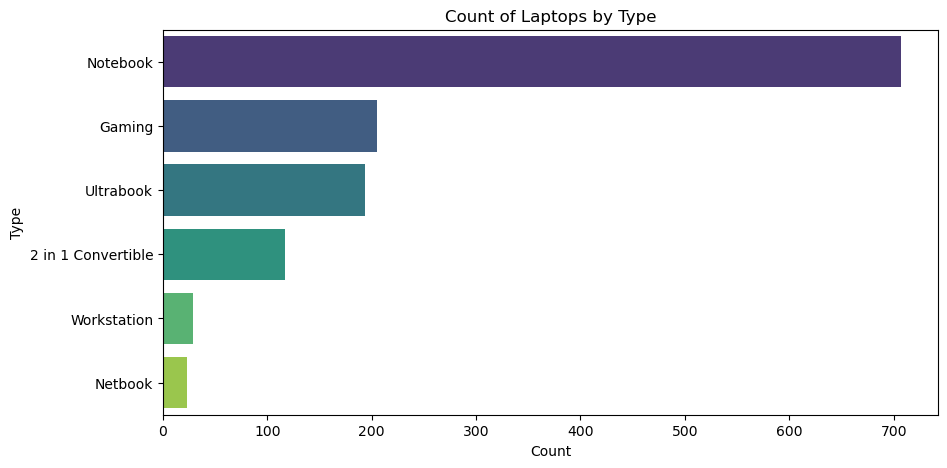

In [23]:
plt.figure(figsize=(10, 5))
sns.countplot(y='TypeName', data=data, order=data['TypeName'].value_counts().index, palette='viridis')
plt.title('Count of Laptops by Type')
plt.xlabel('Count')
plt.ylabel('Type')
plt.show()

The countplot shows that notebooks and ultrabooks are the most common types in the dataset, followed by gaming laptops. This reflects market trends where portable and lightweight devices are popular.

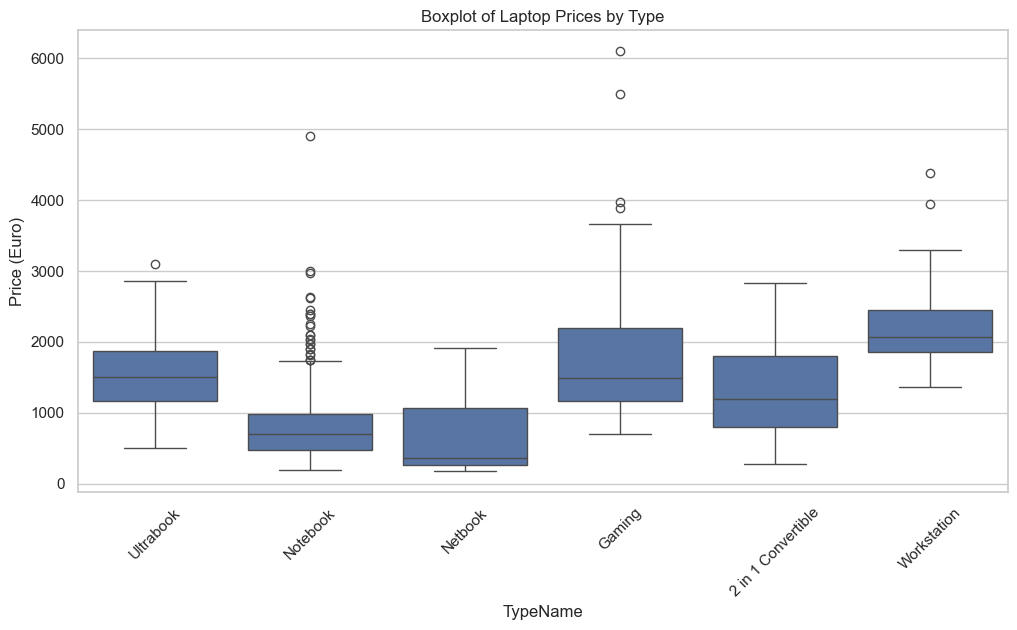

In [59]:
# 3.2 Boxplot of Prices by typename
plt.figure(figsize=(12, 6))
sns.boxplot(x='TypeName', y='Price (Euro)', data=data)
plt.title('Boxplot of Laptop Prices by Type')
plt.xticks(rotation=45)
plt.show()

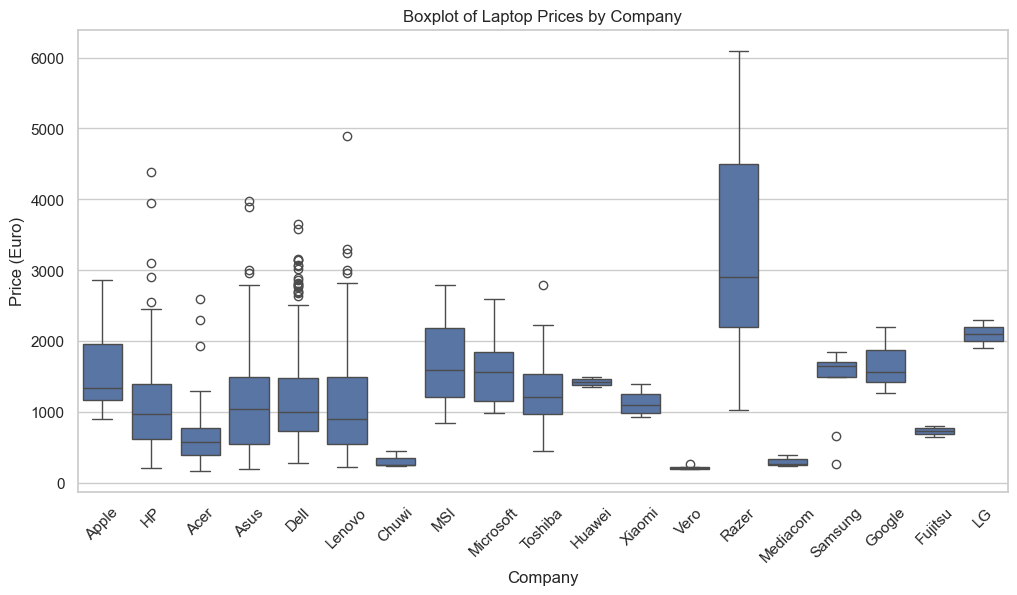

In [57]:
# 3.2 Boxplot of Prices by Company
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Price (Euro)', data=data)
plt.title('Boxplot of Laptop Prices by Company')
plt.xticks(rotation=45)
plt.show()

The boxplot indicates that some brands are generally more expensive as Apple whereas others like HP and Acer have more budget-friendly options.


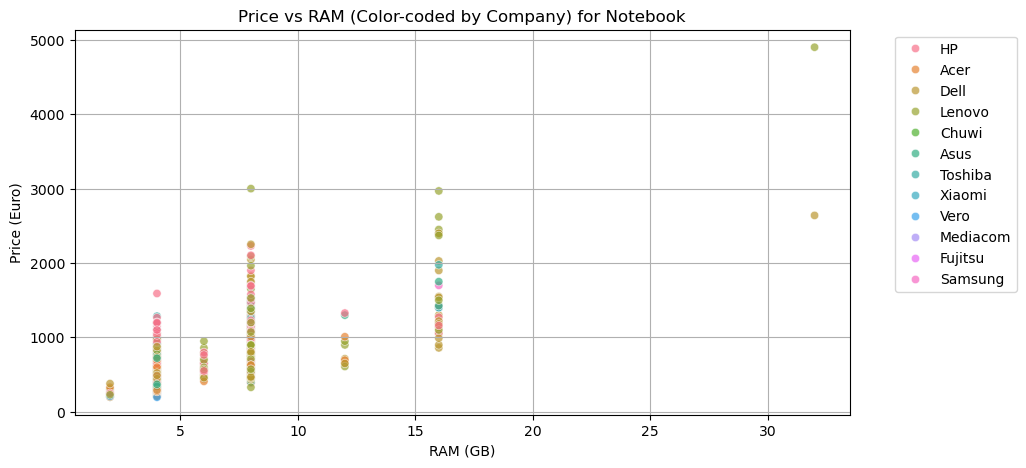

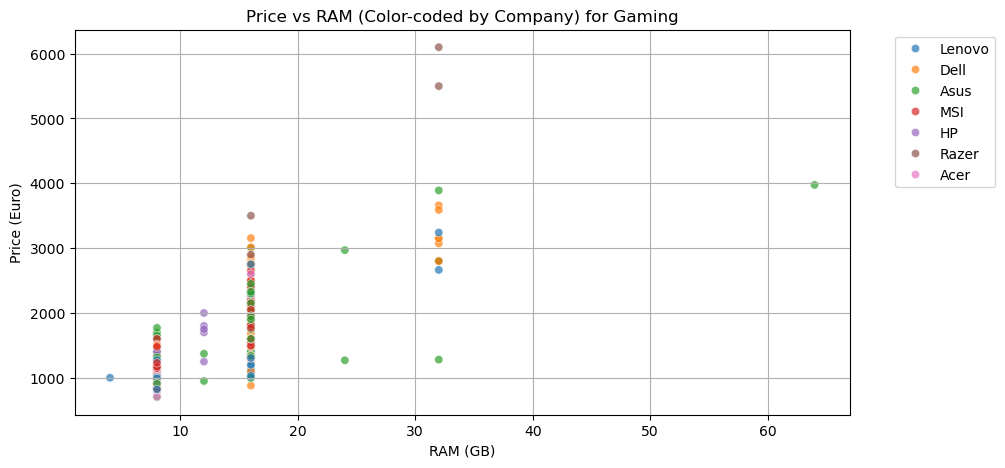

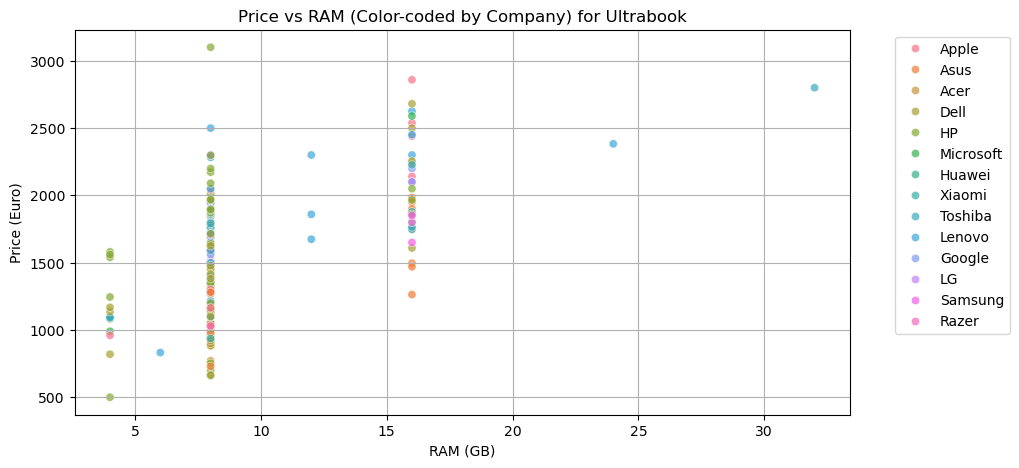

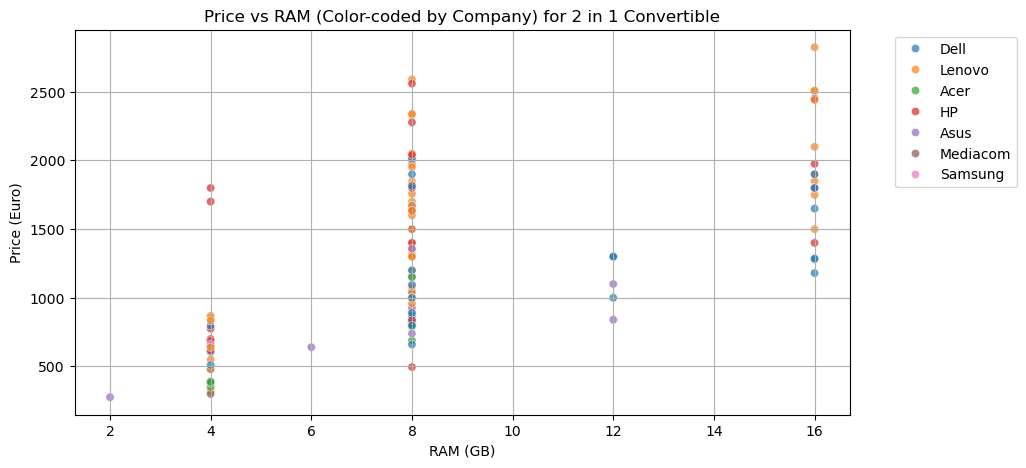

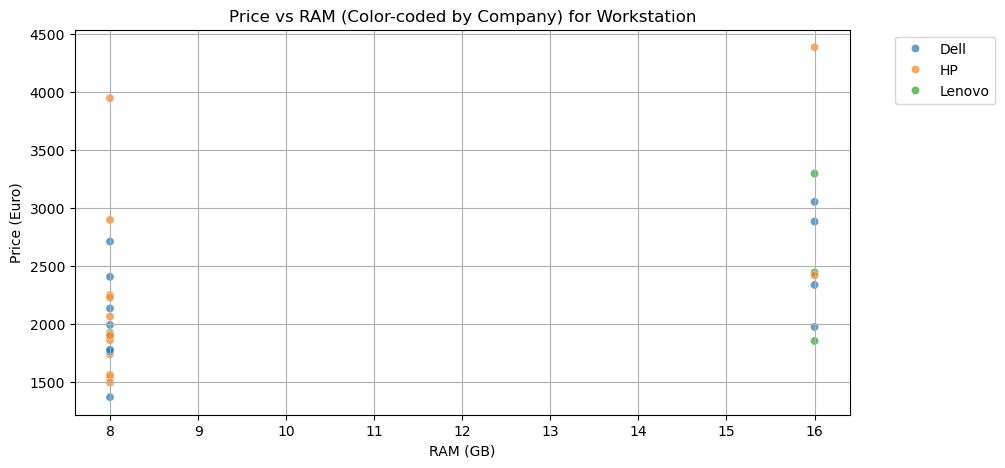

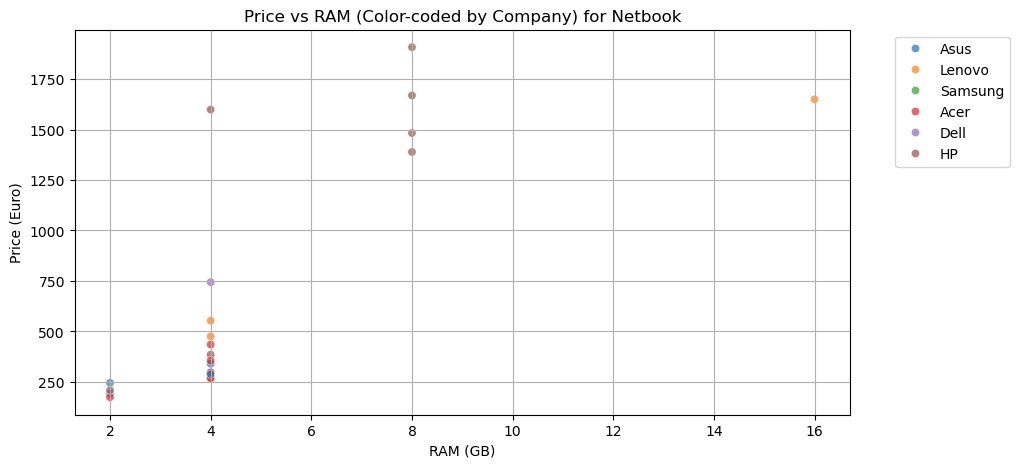

In [119]:
# 3.3 Price vs. RAM
for t in types:
    plt.figure(figsize=(10, 5))
    sns.scatterplot(x='RAM (GB)', y='Price (Euro)', data=data[data['TypeName'] == t], hue='Company', alpha=0.7)
    plt.title(f'Price vs RAM (Color-coded by Company) for {t}')
    plt.xlabel('RAM (GB)')
    plt.ylabel('Price (Euro)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.show()

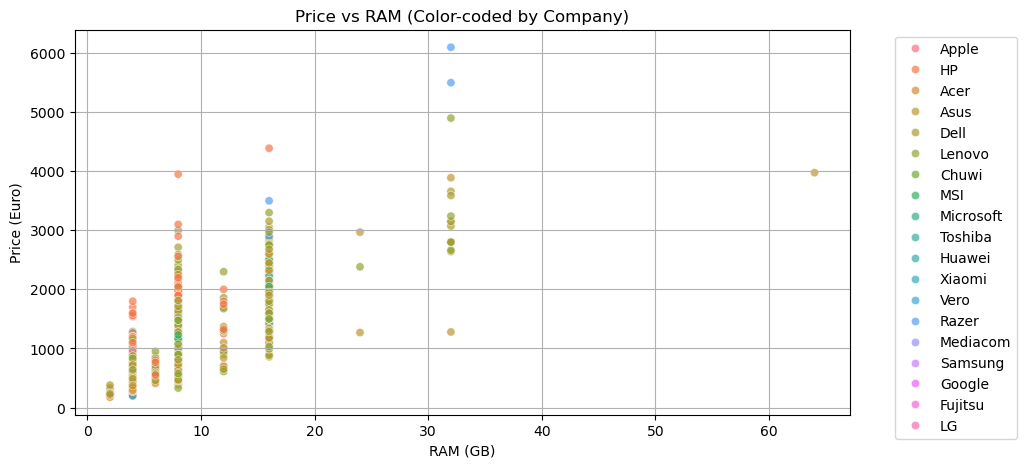

In [122]:
# 3.3 Price vs. RAM
plt.figure(figsize=(10, 5))
sns.scatterplot(x='RAM (GB)', y='Price (Euro)', data=data, hue='Company', alpha=0.7)
plt.title(f'Price vs RAM (Color-coded by Company)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

The scatter plot suggests a positive correlation between RAM and price, with higher RAM configurations typically associated with higher prices. Different companies are represented by color, showing brand-specific pricing strategies.

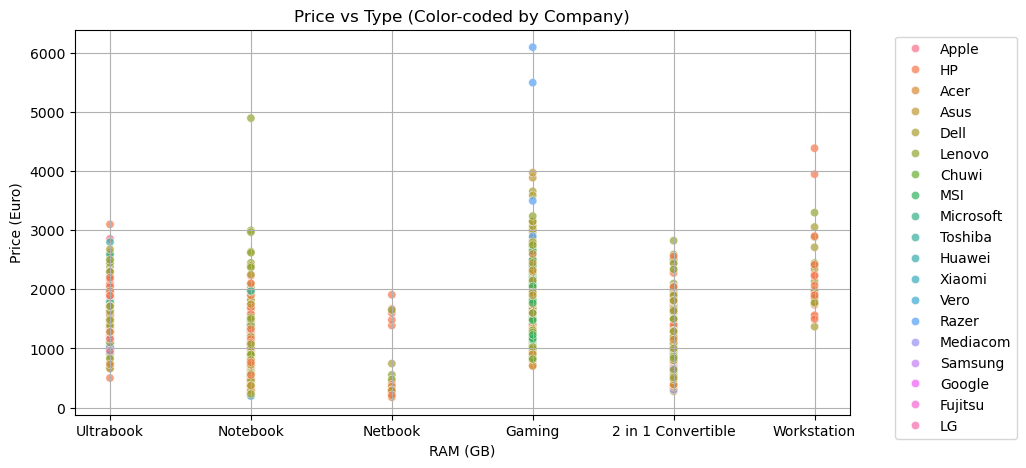

In [109]:
# 3.3 Price vs. RAM
plt.figure(figsize=(10, 5))
sns.scatterplot(y='Price (Euro)', x = 'TypeName', hue='Company', data = data, alpha=0.7)
plt.title(f'Price vs Type (Color-coded by Company)')
plt.xlabel('RAM (GB)')
plt.ylabel('Price (Euro)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

In [85]:
new = data.groupby(['Company','TypeName']).size()
display(new)


Company    TypeName          
Acer       2 in 1 Convertible      8
           Gaming                  8
           Netbook                 5
           Notebook               76
           Ultrabook               4
Apple      Ultrabook              21
Asus       2 in 1 Convertible     13
           Gaming                 54
           Netbook                 4
           Notebook               63
           Ultrabook              18
Chuwi      Notebook                3
Dell       2 in 1 Convertible     30
           Gaming                 40
           Netbook                 2
           Notebook              159
           Ultrabook              49
           Workstation            11
Fujitsu    Notebook                3
Google     Ultrabook               3
HP         2 in 1 Convertible     19
           Gaming                 12
           Netbook                 7
           Notebook              180
           Ultrabook              36
           Workstation            14
Huawei  

In [83]:
data.dtypes

Company                 object
TypeName                object
Inches                 float64
CPU_Frequency (GHz)    float64
RAM (GB)                 int64
Memory                   int64
GPU_Company             object
GPU_Type                object
OpSys                   object
Weight (kg)            float64
Price (Euro)           float64
Total Pixels             int64
dtype: object

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score


In [89]:
categorical_features = list(data.select_dtypes(include=['object']).columns)
categorical_features

['Company', 'TypeName', 'GPU_Company', 'GPU_Type', 'OpSys']

In [99]:
data['company'] = LabelEncoder().fit_transform(data['Company'])
data['typeName'] = LabelEncoder().fit_transform(data['TypeName'])
data['operating_system'] = LabelEncoder().fit_transform(data['OpSys'])
data['gpu_manu'] = LabelEncoder().fit_transform(data['GPU_Company'])
data['gpu_type'] = LabelEncoder().fit_transform(data['GPU_Type'])


#data['Company'].unique()

In [101]:
data = pd.DataFrame(data)


In [103]:
companies = list(data['Company'].unique())
companies.sort()
companies_encoded =  list(data['company'].unique())
companies_encoded.sort()
companies_zip = dict(zip(companies, companies_encoded))
print(companies_zip)

types = list(data['TypeName'].unique())
types.sort()
types_encoded =  list(data['typeName'].unique())
types_encoded.sort()
types_zip = dict(zip(types, types_encoded))
print(types_zip)

ops = list(data['OpSys'].unique())
ops.sort()
ops_encoded =  list(data['operating_system'].unique())
ops_encoded.sort()
ops_zip = dict(zip(ops, ops_encoded))
print(ops_zip)

{'Acer': 0, 'Apple': 1, 'Asus': 2, 'Chuwi': 3, 'Dell': 4, 'Fujitsu': 5, 'Google': 6, 'HP': 7, 'Huawei': 8, 'LG': 9, 'Lenovo': 10, 'MSI': 11, 'Mediacom': 12, 'Microsoft': 13, 'Razer': 14, 'Samsung': 15, 'Toshiba': 16, 'Vero': 17, 'Xiaomi': 18}
{'2 in 1 Convertible': 0, 'Gaming': 1, 'Netbook': 2, 'Notebook': 3, 'Ultrabook': 4, 'Workstation': 5}
{'Android': 0, 'Chrome OS': 1, 'Linux': 2, 'Mac OS X': 3, 'No OS': 4, 'Windows 10': 5, 'Windows 10 S': 6, 'Windows 7': 7, 'macOS': 8}


In [105]:
data = data.drop(categorical_features, axis = 1)

In [107]:
data

,Inches,CPU_Frequency (GHz),RAM (GB),Memory,Weight (kg),Price (Euro),Total Pixels,company,typeName,operating_system,gpu_manu,gpu_type
0,13.3,2.3,8,128,1.37,1339.69,4096000,1,4,8,2,56
1,13.3,1.8,8,128,1.34,898.94,1296000,1,4,8,2,50
2,15.6,2.5,8,256,1.86,575.00,2073600,7,3,4,2,52
3,15.4,2.7,16,512,1.83,2537.45,5184000,1,4,8,0,76
4,13.3,3.1,8,256,1.37,1803.60,4096000,1,4,8,2,57
...,...,...,...,...,...,...,...,...,...,...,...,...
1270,14.0,2.5,4,128,1.80,638.00,2073600,10,0,5,2,46
1271,13.3,2.5,16,512,1.30,1499.00,5760000,10,0,5,2,46
1272,14.0,1.6,2,64,1.50,229.00,1049088,10,3,5,2,39
1273,15.6,2.5,6,1024,2.19,764.00,1049088,7,3,5,0,88


In [109]:
X = data.drop(['Price (Euro)'], axis=1)
y = data['Price (Euro)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression_model = LinearRegression()
Random_forest_model = RandomForestRegressor()
models = {'linear_regression_model': linear_regression_model, 'Random_forest_model': Random_forest_model}

def model_eval():
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = root_mean_squared_error(y_test, y_pred)
        accuracy = model.score(X_test, y_test)
    # Visualization: Best-fit line 
        plt.scatter(y_test, y_pred, alpha=0.5, label="Actual vs Predicted")
        plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label="Ideal Fit")
        plt.xlabel("Actual Prices")
        plt.ylabel("Predicted Prices")
        plt.title(f"{name}: Actual vs Predicted")
        plt.legend()
        plt.show()
        residuals = y_test - y_pred
        plt.scatter(y_pred, residuals)
        plt.xlabel('Predicted Price')
        plt.ylabel('Residuals')
        plt.title('Residual Plot')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.show()
        print('-' * 10)
        print(f"{name} - accuracy = {accuracy} - Root Mean Squared Error: {mse:.2f} - Mean y_pred = {y_pred.mean():.2f}")

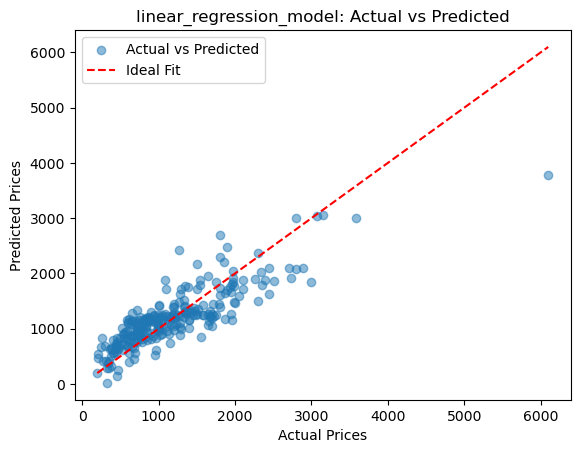

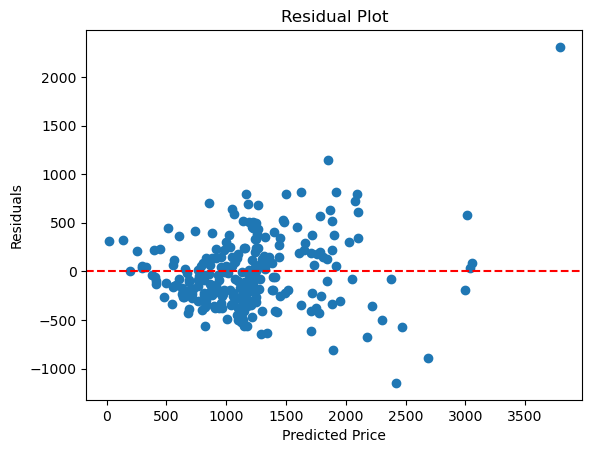

----------
linear_regression_model - accuracy = 0.7187413770133084 - Root Mean Squared Error: 373.63 - Mean y_pred = 1196.90


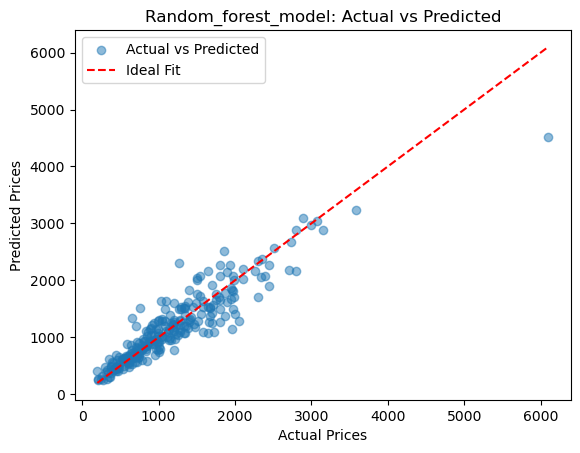

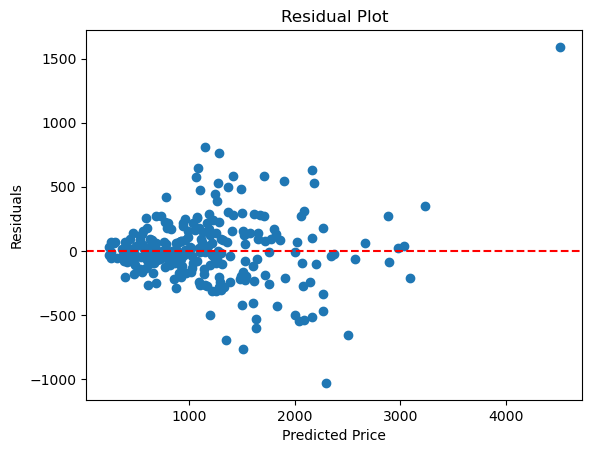

----------
Random_forest_model - accuracy = 0.8573265902329874 - Root Mean Squared Error: 266.11 - Mean y_pred = 1171.67


In [111]:
model_eval()

1. Actual vs Predicted : This sctter plot compares the actual price with the predicted price . The closer the points are to a straight line, the better the model’s predictions.
2. Residual Plot: This plot shows the residuals (differences between the predicted and actual petal widths) against the predicted values. A well-performing model will have residuals scattered randomly around zero (the red dashed line).

In [113]:
data.to_csv('transformed_laptop_prices_dataset.csv')

In [115]:
import pickle

pickle.dump(Random_forest_model, open("random_forst_model_laptopprices.pkl", "wb"))

In [117]:
data.columns

Index(['Inches', 'CPU_Frequency (GHz)', 'RAM (GB)', 'Memory', 'Weight (kg)',
       'Price (Euro)', 'Total Pixels', 'company', 'typeName',
       'operating_system', 'gpu_manu', 'gpu_type'],
      dtype='object')

In [119]:
data.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Memory,Weight (kg),Price (Euro),Total Pixels,company,typeName,operating_system,gpu_manu,gpu_type
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1.275000e+03,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,612.555294,2.040525,1134.969059,2.179579e+06,6.460392,2.582745,4.814118,2.036863,47.280784
std,1.429470,0.503846,5.097809,482.526819,0.669196,700.752504,1.392876e+06,4.096247,1.247925,1.034319,0.925510,26.034717
min,10.100000,0.900000,2.000000,0.000000,0.690000,174.000000,1.049088e+06,0.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,2.000000,4.000000,256.000000,1.500000,609.000000,2.073600e+06,4.000000,1.000000,5.000000,2.000000,28.000000
50%,15.600000,2.500000,8.000000,500.000000,2.040000,989.000000,2.073600e+06,7.000000,3.000000,5.000000,2.000000,46.000000
75%,15.600000,2.700000,8.000000,1024.000000,2.310000,1496.500000,2.073600e+06,10.000000,3.000000,5.000000,3.000000,52.000000
max,18.400000,3.600000,64.000000,2560.000000,4.700000,6099.000000,8.294400e+06,18.000000,5.000000,8.000000,3.000000,105.000000


In [121]:
loaded_model = pickle.load(open("random_forst_model_laptopprices.pkl", "rb"))

In [123]:
loaded_model_score =loaded_model.score(X_test, y_test)
loaded_model_score


0.8573265902329874

In [125]:
user_data = pd.DataFrame({
"Inches": [10.1],
'CPU_Frequency (GHz)': [2],
'RAM (GB)': [8],
'Memory': [256],
'Weight (kg)' : [2.040000],
'Total Pixels' : [2.073600e+06],
'company' : [1],
'typeName': [2],
'operating_system':[2]
})


In [579]:
prediction = loaded_model.predict(user_data)

In [583]:
prediction[0]

740.8133666666669